# Titanic Data Preparation and Predictive Modeling
**Example by David Cochran**

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition ...

1. Read in the original data.
2. Perform preparation steps — rationale explained in a separate EDA notebook.
2. Split the data into Train (60%) / Validate (20%) / Test (20%)
3. Train, Fit, Test, Evaluate and Compare Models using These Algorithms

References and Resources:
- [Churn Modeling Notebook by cutterback](https://github.com/cutterback/p03-telco-churn-model/blob/master/Telco-Churn-Classification-Model.ipynb)
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
- https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65


# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale = 1.1)
%matplotlib inline
from time import time

# Machine Learning Training, Scoring, and Metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer, precision_recall_curve, classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Data Preparation

In [2]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Drop irrelevant columns
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

# Fill missing age values with average age
df['Age'].fillna(df['Age'].mean(), inplace = True)

# Create Family_count from SibSp and Parch
df['Family_count'] = df['SibSp'] + df['Parch']

# Drop SibSp and Parch
df.drop(['SibSp','Parch'], axis=1, inplace=True)

# Create Cabin_ind
df['Cabin_ind'] = np.where(df['Cabin'].isnull(), 0, 1)

# Drop Cabin and Embarked
df.drop(['Cabin','Embarked'], axis=1, inplace=True)

# Convert sex to numeric indicator
gender_map = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(gender_map)

# View Updated Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   Family_count  891 non-null    int64  
 6   Cabin_ind     891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [5]:
# View first records
df.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


# Split into Train, Validation, and Test Sets
See the [train_test_split docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

- Train = 60%
- Validation = 20%
- Test = 20%

In [6]:
features = df.drop('Survived', axis=1)
labels = df['Survived']
# First Split: Train/Test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
# Second Split: Test into Validation/Test
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Report the number of records and labels in each new split:
print('Training Features, Labels:')
print(f'{X_train.shape[0]} Records, {len(y_train)} Labels')
print('-----------')
print('Validation Features, Labels:')
print(f'{X_val.shape[0]} Records, {len(y_val)} Labels')
print('-------')
print('Test Features, Labels:')
print(f'{X_test.shape[0]} Records, {len(y_test)} Labels')

Training Features, Labels:
534 Records, 534 Labels
-----------
Validation Features, Labels:
179 Records, 179 Labels
-------
Test Features, Labels:
178 Records, 178 Labels


In [7]:
# Update Variable Names for Machine Learning
# Training Set (60%)
tr_features = X_train
tr_labels = y_train

# Validation Set (20%)
val_features = X_val
val_labels = y_val

# Test Set (20%)
test_features = X_test
test_labels = y_test

# Train and Tune Models using 5-Fold Cross-Validation

See the [GridSearchCV docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

## Setup
- Create an empty list to hold our best models
- Set fundamental parameters
- Define functions to implement gridsearch and report results

In [8]:
# Create an empty list to hold our best models
models = []

# Establish number of splits for k-fold cross-validation
k = 5

# Specify random seed value
seed = 42

### instiantiate_grid
- Set up defaults for Gridsearch CV, incluing the scorers we want, and the priority
- Set to default to prioritize roc_auc in model fitting and selecting best model

In [16]:
# Set up defaults for Gridsearch CV, incluing the scorers we want, and the priority
# Set to default to prioritize roc_auc
def instantiate_grid(algorithm, param_grid, refit='roc_auc'):
        
    # Set up scorers
    scoring = {
                'roc_auc': make_scorer(roc_auc_score, greater_is_better=True,
                         needs_threshold=False),
                'f1': make_scorer(f1_score),
                'accuracy': make_scorer(accuracy_score),
                'precision': make_scorer(precision_score),
                'recall': make_scorer(recall_score)
              }

    cv = GridSearchCV(
                        estimator=algorithm,
                        param_grid=param_grid, 
                        scoring=scoring,
                        refit=refit, 
                        cv=StratifiedKFold(n_splits=k, random_state=seed, shuffle=True)
                     )
    
    return cv

### show_grid_metrics
- Specify metrics we desire from GridsearchCV results
- Sort by desired metric

In [17]:
# Display grid results ranked
def show_grid_metrics(cv_results, sort_by, top_n=10):

    # Specify evaluation metrics that we desire from GridSearchCV results
    metrics = ['params',
               'rank_test_roc_auc',
               'mean_test_roc_auc',
               'rank_test_f1',
               'mean_test_f1',
               'mean_test_accuracy', 
               'mean_test_precision',
               'mean_test_recall'
              ]
    
    cv_results_metrics = cv_results.loc[:, metrics]
    cv_results_metrics.sort_values(by=[sort_by], ascending=False, inplace=True)

    return cv_results_metrics

## Logistic Regression: Train and Tune 
- [GridSearchCV Docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [LogisticRegression Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [18]:
# Execute GridSearch and Report Results

# Specify Algorithm shortname
name = 'LR'

# Specify algorithm with desired default parameters
algorithm = LogisticRegression(random_state=seed, fit_intercept=False, max_iter=500, n_jobs=-1)

# Set parameters for GridSearch, to identify best parameters
param_grid = {
    'C': [.001, .01, 1, 10, 100, 1000]
}

# /////////////////////////////////////////////////////////
# Standard process for cross-validating using Gridsearch
# /////////////////////////////////////////////////////////

# Instantiate gridsearch object for this algorithm
cv = instantiate_grid(algorithm, param_grid)

start = time()

# Activate gridsearch
cv.fit(features, labels)

end = time()
latency = round((end-start), 2)

# Create dataframe from gridsearch cv_results_
cv_results = pd.DataFrame.from_dict(cv.cv_results_)

# Print heading
print(f'\nTOP-PERFORMING {name} MODELS\n')
print(f'Training Latency: {latency}s')

# Display the results for top 5 sorted by ROC-AUC
show_grid_metrics(cv_results, 'mean_test_roc_auc', top_n=5)


TOP-PERFORMING LR MODELS

Training Latency: 2.16s


,params,rank_test_roc_auc,mean_test_roc_auc,rank_test_f1,mean_test_f1,mean_test_accuracy,mean_test_precision,mean_test_recall
4,{'C': 100},1,0.780835,1,0.728283,0.797973,0.751291,0.707374
5,{'C': 1000},1,0.780835,1,0.728283,0.797973,0.751291,0.707374
3,{'C': 10},3,0.779385,3,0.726369,0.796855,0.750547,0.704476
2,{'C': 1},4,0.775912,4,0.721795,0.794608,0.750555,0.695695
1,{'C': 0.01},5,0.652323,5,0.493244,0.721650,0.815924,0.353836
0,{'C': 0.001},6,0.613164,6,0.413579,0.689109,0.748943,0.286445


In [22]:
# Best score is the best mean_test_roc_auc score, as configured in GridSearchCV setup
cv.best_score_

0.7808347500439056

In [23]:
# Best estimator is the model with the best mean_test_roc_auc score
cv.best_estimator_

LogisticRegression(C=100, fit_intercept=False, max_iter=500, n_jobs=-1,
                   random_state=42)

In [24]:
# Best params are the params for the best estimator
cv.best_params_

{'C': 100}

In [12]:
# If desired, use this to view the entire GridSearch CV results object
# gs.cv_results_

### Store the best model to our models list

In [25]:
# Provide desired model shortname
name = 'LR'

# Auto-add model information to models list
model = cv.best_estimator_
params = cv.best_params_
score = round(cv.best_score_ * 100, 3)
models.append({'Name': name, 'Params': params, 'Model': model, 'Score': score})
for m in models:
    print(f'{m["Name"]} MODEL {m["Params"]}\n\t AUC Score: {m["Score"]}\n')

LR MODEL {'C': 100}
	 AUC Score: 78.083



In [38]:
# Store LR model to its own variable
LRmodel = cv.best_estimator_
LRmodel

LogisticRegression(C=100, fit_intercept=False, max_iter=500, n_jobs=-1,
                   random_state=42)

# ///////////////////////////////////////////////
# Confusion Matrices
# ///////////////////////////////////////////////

### Confusion Matrix Resources
- [Scikit-Learn Confusion Matrix Docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [Scikit-Learn Model Evaluation Docs](https://scikit-learn.org/stable/modules/model_evaluation.html)
- [Confusion Matrix Visualization - Dennis T](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)
- [Stackoverflow example](https://stackoverflow.com/a/36165952)
- [Various Confusion Matrix Plots - Kaggle Notebook](https://www.kaggle.com/agungor2/various-confusion-matrix-plots)

In [31]:
# Basic Confusion matrix
# Use LRmodel stored above
confusion_matrix(y_train, LRmodel.predict(X_train))

array([[287,  46],
       [ 57, 144]])

In [32]:
# Print basic confusion matrix
cm = confusion_matrix(y_train, LRmodel.predict(X_train))
print(cm)

[[287  46]
 [ 57 144]]


In [26]:
# Basic Confusion matrix loop
for model in models:
    cm = confusion_matrix(y_train, model['Model'].predict(X_train))
    print(model['Name'])
    print(cm)

LR
[[287  46]
 [ 57 144]]


In [41]:
# Normalized confusion matrix
# Percentages by row (predicted vs actual)
confusion_matrix(y_train, LRmodel.predict(X_train), normalize='true')

array([[0.86186186, 0.13813814],
       [0.28358209, 0.71641791]])

In [42]:
# Normalized confusion matrix
# Percentages by column (predicted)
confusion_matrix(y_train, LRmodel.predict(X_train), normalize='pred')

array([[0.83430233, 0.24210526],
       [0.16569767, 0.75789474]])

In [43]:
# Normalized confusion matrix
# Percentages of all
confusion_matrix(y_train, LRmodel.predict(X_train), normalize='all')

array([[0.53745318, 0.08614232],
       [0.10674157, 0.26966292]])

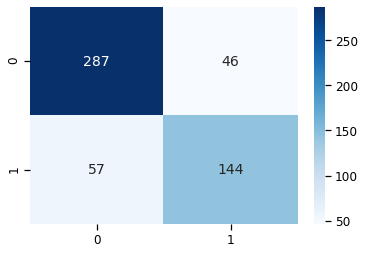

In [33]:
# Seaborn heatmap with labels formatted as whole integers and annotation fontsize adjusted
# basic confusion matrix
cm = confusion_matrix(y_train, LRmodel.predict(X_train))

# Convert to a dataframe
cmdf = pd.DataFrame(cm)

# Plot it as a heatmap
plt.figure(figsize = (6,4))
sns.heatmap(cmdf, annot=True, fmt = '.0f', cmap='Blues', annot_kws={"size": 14});

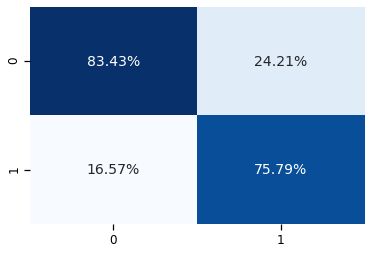

In [44]:
# Seaborn confusion matrix heatmap
# with labels formatted as percentages and annotation fontsize adjusted

# basic confusion matrix
cm = confusion_matrix(y_train, LRmodel.predict(X_train))

# Convert tp dataframe
cmdf = pd.DataFrame(cm)

# Plot as heatmap with labels as percentages
plt.figure(figsize = (6,4))
sns.heatmap(cmdf / np.sum(cmdf), annot=True, fmt = '.2%', cmap='Blues', annot_kws={"size": 14}, cbar=None);

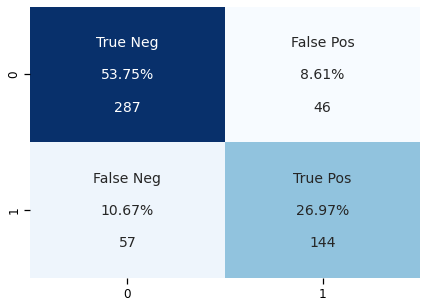

In [45]:
# Confusion matrix displaying labels, percentages, and counts
# See: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

# basic confusion matrix
cm = confusion_matrix(y_train, LRmodel.predict(X_train))

# magic
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_percentages,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14}, cbar=None); # NOTE: fmt='' is required!

In [47]:
# Define function to display confusion matrix
# Confusion matrix displaying labels, percentages, and counts
# See: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

def cm_plot(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cm.flatten()/np.sum(cm)]
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
              zip(group_names,group_percentages,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14}, cbar=None); # NOTE: fmt='' is required!

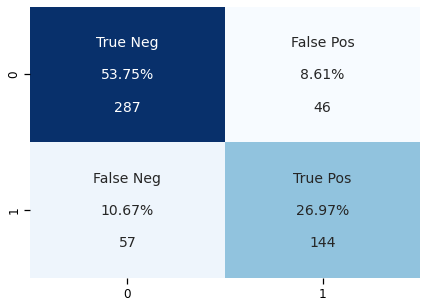

In [48]:
cm_plot(cm)

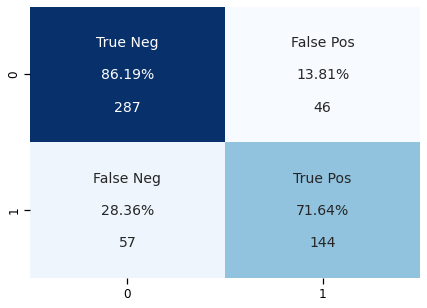

In [49]:
# CALCULATE PERCENTAGES BY ROW, USING A NORMALIZED CM
# Define function to display confusion matrix
# Confusion matrix displaying labels, percentages, and counts
# See: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

# basic confusion matrix
cm = confusion_matrix(y_train, LRmodel.predict(X_train))

# normalized confusion matrix, percentages by row (predict vs actual)
cm_norm = confusion_matrix(y_train, LRmodel.predict(X_train), normalize='true')

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_norm.flatten()]
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_percentages,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14}, cbar=None); # NOTE: fmt='' is required!

## Advanced Confusion Matrix Function
based on: https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

### Arguments
---------
cf:            confusion matrix to be passed in

group_names:   List of strings that represent the labels row by row to be shown in each square.

categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

count:         If True, show the raw number in the confusion matrix. Default is True.

normalize:     If True, show the proportions for each category. Default is True.

cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
               Default is True.

xyticks:       If True, show x and y ticks. Default is True.

xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

sum_stats:     If True, display summary statistics below the figure. Default is True.

figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
               See http://matplotlib.org/examples/color/colormaps_reference.html

In [66]:
# Updated to: 
# include normalized confusion matrix for percentages
# use cm for confusion matrix vs. cf

def make_confusion_matrix(cm,
                          cm_norm,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cm:            confusion matrix to be passed in
    cm_norm:            normalized confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cm.size)]

    if group_names and len(group_names)==cm.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cm_norm.flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cm) / float(np.sum(cm))

        #if it is a binary confusion matrix, show some more stats
        if len(cm)==2:
            #Metrics for Binary Confusion Matrices
            precision = cm[1,1] / sum(cm[:,1])
            recall    = cm[1,1] / sum(cm[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cm,annot=box_labels,annot_kws={"size": 14},fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

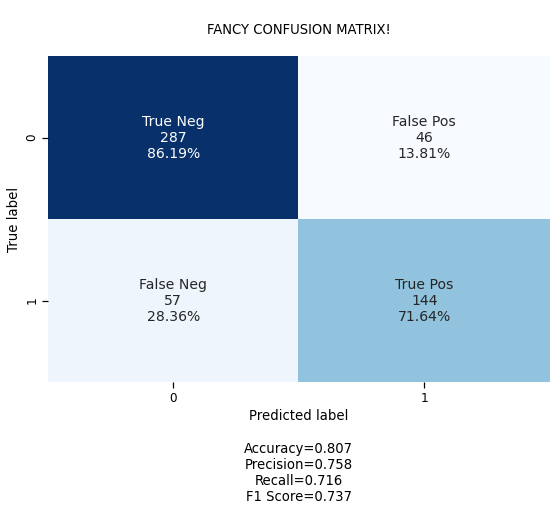

In [67]:
# Create confusion matrices and then use the above function to visualize and report

# basic confusion matrix
cm = confusion_matrix(y_train, LRmodel.predict(X_train))

# normalized confusion matrix, percentages by row (predict vs actual)
cm_norm = confusion_matrix(y_train, LRmodel.predict(X_train), normalize='true')

make_confusion_matrix(cm, cm_norm, 
                      group_names = ['True Neg','False Pos','False Neg','True Pos'], 
                      categories='auto', 
                      cbar=False, sum_stats=True, 
                      figsize=(9,6), cmap='Blues', 
                      title='\nFANCY CONFUSION MATRIX!\n')

# ///////////////////////////////////////////////
# Unfinished below
# ///////////////////////////////////////////////

In [ ]:
# Precision-Recall Curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

y_score = cv.best_estimator_.decision_function(X_train)
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(cv.best_estimator_, X_train, y_train)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
for model in models:
    cm = confusion_matrix(y_train, model['Model'].predict(X_train))
    print(model['Name'])
    print(cm)

In [ ]:
model

In [ ]:
models

In [ ]:
models

## Random Forest: Train and Tune 
- [RandomForestClassifier Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [GridSearchCV Docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [ ]:
# Specify algorithm
algorithm = RandomForestClassifier()

# Set parameters for GridSearch, to identify best parameters
parameters = {
    'max_depth': [2, 4, 8, 16, 32, None],
    'n_estimators': [5, 50, 250]
}

# Run the classifier using k-fold cross-validation with Gridsearch to identify best parameters
start = time()
cv = GridSearchCV(algorithm, parameters, cv=5)
cv.fit(tr_features, tr_labels)
end = time()
latency = round((end - start), 2)

print_results(cv, latency)

### Store the best model to our models list

In [ ]:
# Provide desired model shortname
name = 'RF'

# Auto-add model information to models list
model = cv.best_estimator_
params = cv.best_params_
score = round(cv.best_score_ * 100, 3)
models.append({'Name': name, 'Params': params, 'Model': model, 'Score': score})
for m in models:
    print(f'{m["Name"]} MODEL {m["Params"]}\n\t Score: {m["Score"]} accuracy with training data\n')

## Multi-Layer Perceptron: Train and Tune

[MLPClassifier Docs](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
# Specify algorithm
algorithm = MLPClassifier()

# Set parameters for GridSearch, to identify best parameters
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter':[10000] # Raise from default 200 to avoid max iteration warnings
}

# Run the classifier using k-fold cross-validation with Gridsearch to identify best parameters
start = time()
cv = GridSearchCV(algorithm, parameters, cv=5)
cv.fit(tr_features, tr_labels)
end = time()
latency = round((end - start), 2)

print_results(cv, latency)

### Store the best model to our models list

In [ ]:
# Provide desired model shortname
name = 'MLP'

# Auto-add model information to models list
model = cv.best_estimator_
params = cv.best_params_
score = round(cv.best_score_ * 100, 3)
models.append({'Name': name, 'Params': params, 'Model': model, 'Score': score})
for m in models:
    print(f'{m["Name"]} MODEL {m["Params"]}\n\t Score: {m["Score"]} accuracy with training data\n')

## Gradient Boosting: Train and Tune

[GradientBoostingClassifier Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [ ]:
# Specify the algorithm to use
algorithm = GradientBoostingClassifier()

# Set parameters for GridSearch, to identify best parameters
parameters = {
    'max_depth': [5, 50, 250, 500],
    'n_estimators': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

# Run the classifier using k-fold cross-validation with Gridsearch to identify best parameters
start = time()
cv = GridSearchCV(algorithm, parameters, cv=5)
cv.fit(tr_features, tr_labels)
end = time()
latency = round((end - start), 2)

print_results(cv, latency)

### Store the best model to our models list

In [ ]:
# Provide desired model shortname
name = 'GB'

# Auto-add model information to models list
model = cv.best_estimator_
params = cv.best_params_
score = round(cv.best_score_ * 100, 3)
models.append({'Name': name, 'Params': params, 'Model': model, 'Score': score})
for m in models:
    print(f'{m["Name"]} MODEL {m["Params"]}\n\t Score: {m["Score"]} accuracy with training data\n')

### View the full models list
The models list contains a Python dictionary for each model, with Name, Params, Score (with training data), _and the full Model object_. The model object carries all needed model information with it (not always fully displayed, but available in its attributes) and is what will be used in Validation and Testing.

In [ ]:
# View the full models list
models

# Validation
We'll evaluate the performance of our three best models with the validation set.

In [ ]:
# Define function for model evaluation
def model_eval(model, features, labels):
    start = time()
    pred = model['Model'].predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred)*100, 3)
    precision = round(precision_score(labels, pred)*100, 3)
    recall = round(recall_score(labels, pred)*100, 3)
    latency = round((end - start), 5)
    print(f'{model["Name"]} MODEL: {model["Params"]}')
    print(f'    Score: Accuracy {accuracy} | Precision {precision} | Recall {recall} | Latency {latency}s\n')

In [ ]:
# Compare the performance of each top model with our validation data set
for model in models:
    model_eval(model, val_features, val_labels)

# Test

As this is a learning exercise, we'll now evaluate all three of our top models on the test set as well, to see how their performance differs.

In [ ]:
# Compare the performance of each top model with our test data set
for model in models:
    model_eval(model, test_features, test_labels)